In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, lf3d, j3d
from mhsflex.vis import plot
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)
c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [4]:
a = 0.44
alpha = 0.05
b = 1.0
z0 = 2.0

In [5]:
data3d_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2)
data3dNW_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2, asymptotic=False)
data3d_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0)
data3dNW_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0, asymptotic=False)
data3d_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0)
data3dNW_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0, asymptotic=False)

In [6]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 20.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 10.0)
z_z0 = z0

iz_2z0 = int(2 * nresol_z / 10.0)
z_2z0 = 2 * z0

In [7]:
ErrormapL = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-F1535C
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c7),
    ),
)

In [8]:
x_plot = np.outer(data3d_02.y, np.ones(data3d_02.nx))
y_plot = np.outer(data3d_02.x, np.ones(data3d_02.ny)).T

In [15]:
deltaz = 0.2
data3d = data3d_02
data3dNW = data3dNW_02

folder = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/" + str(deltaz)

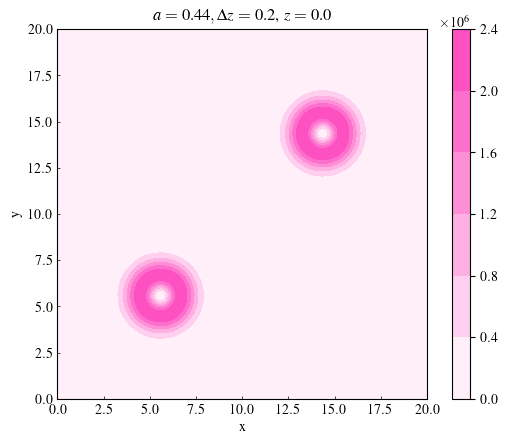

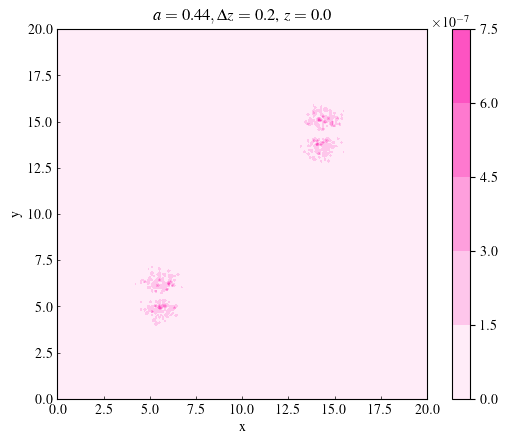

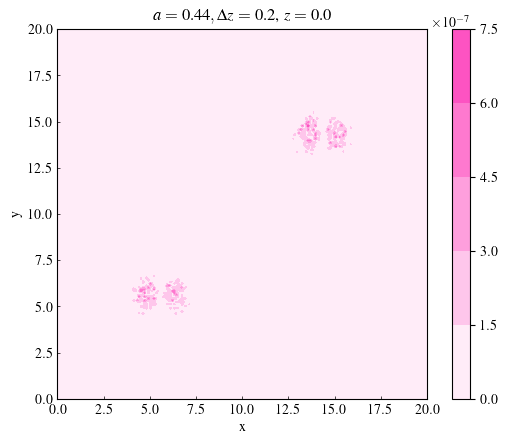

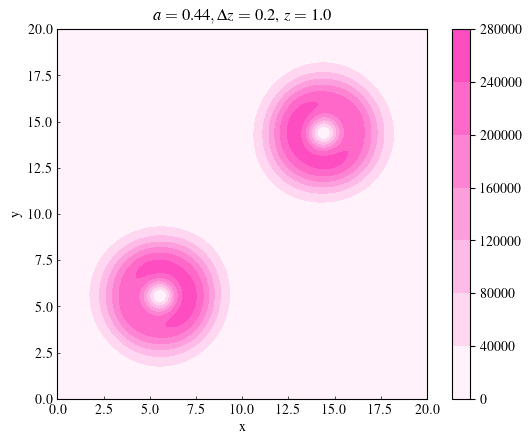

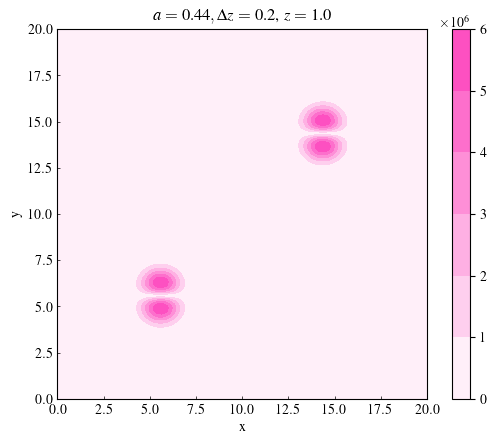

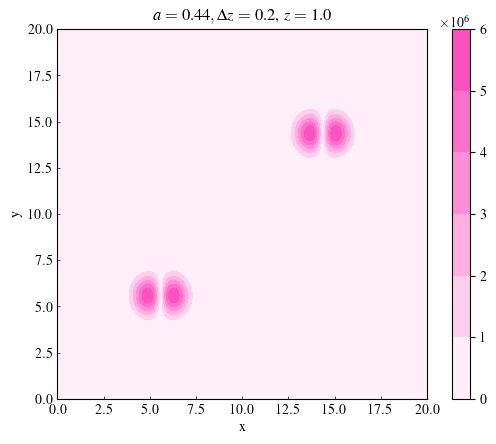

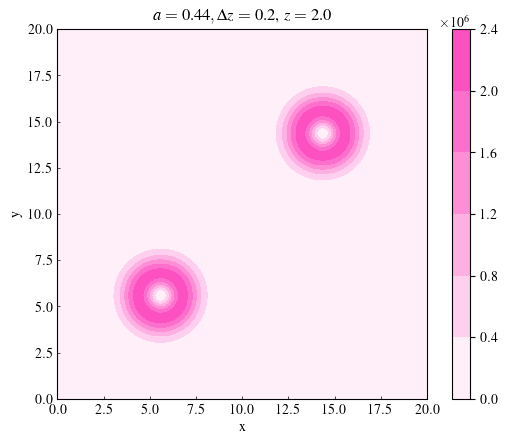

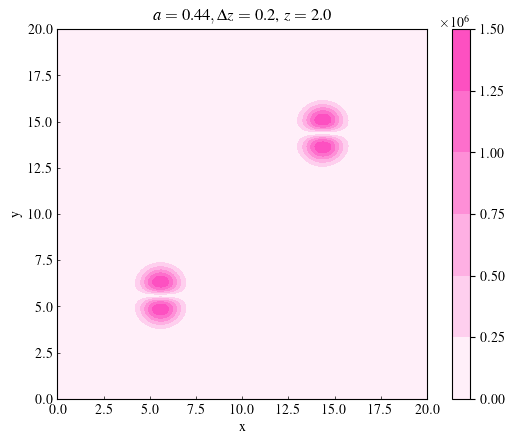

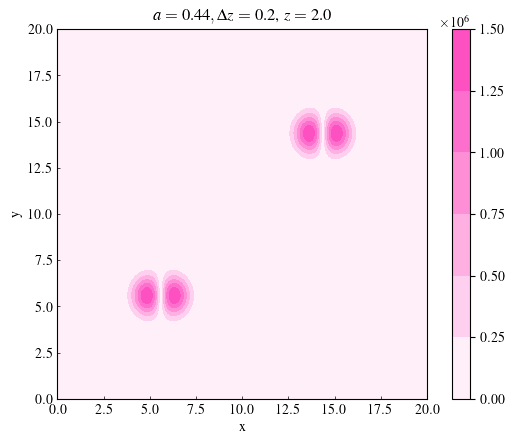

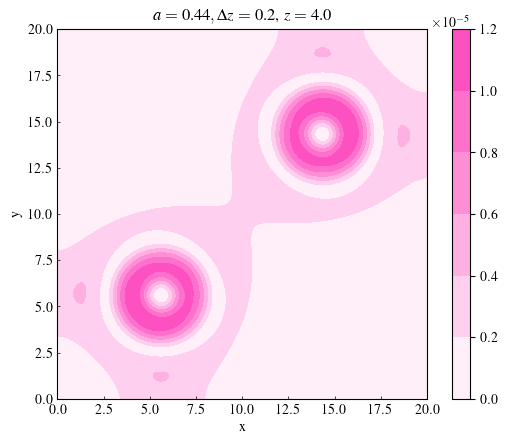

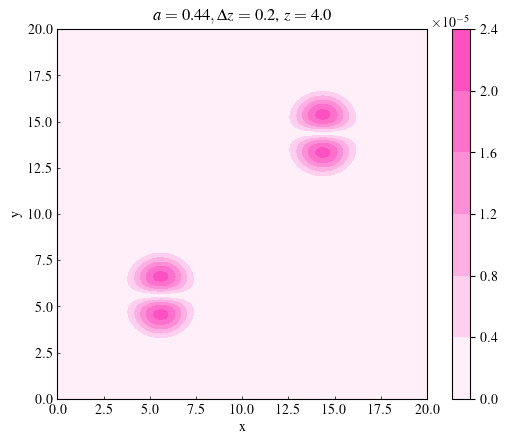

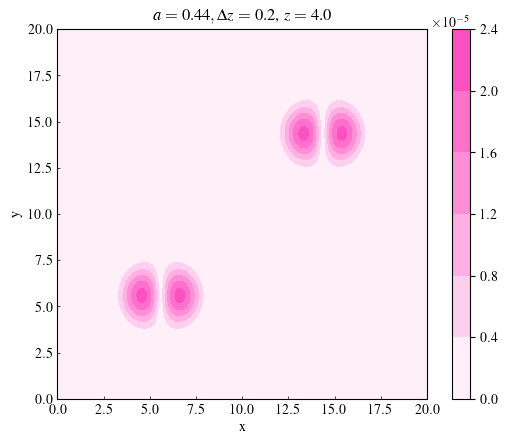

In [16]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(
            data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2]
            - data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2]
        ),
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lferrorz_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(
            data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1]
            - data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1]
        ),
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lferrorx_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(
            data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0]
            - data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0]
        ),
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lferrory_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

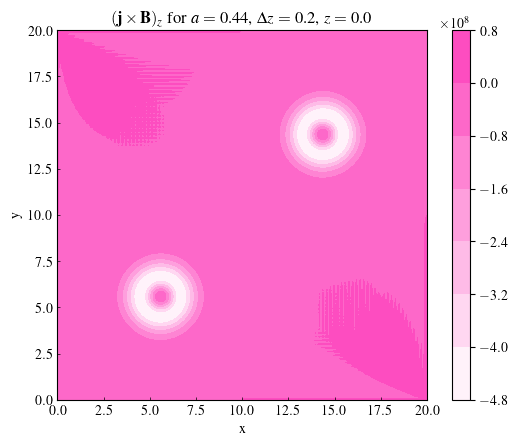

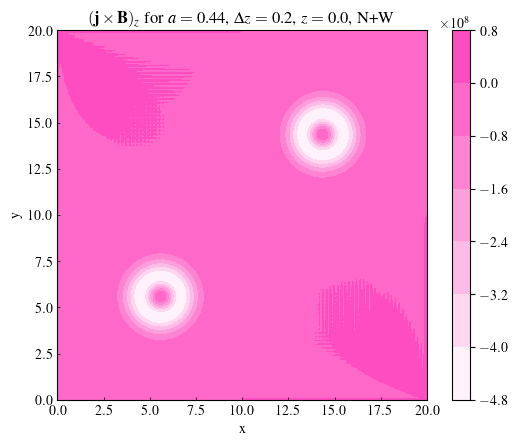

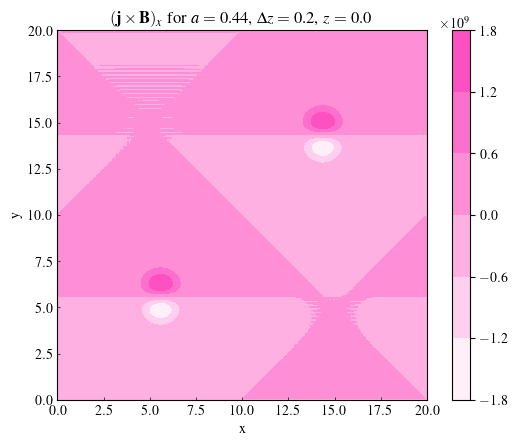

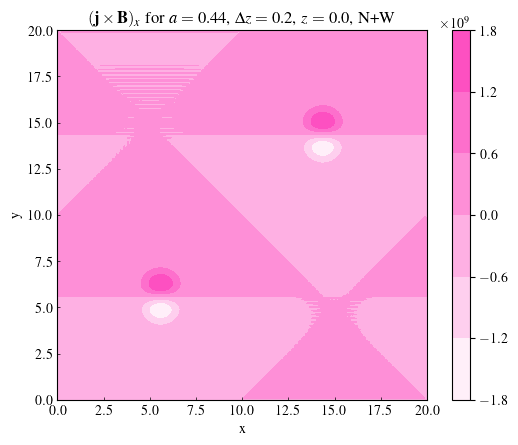

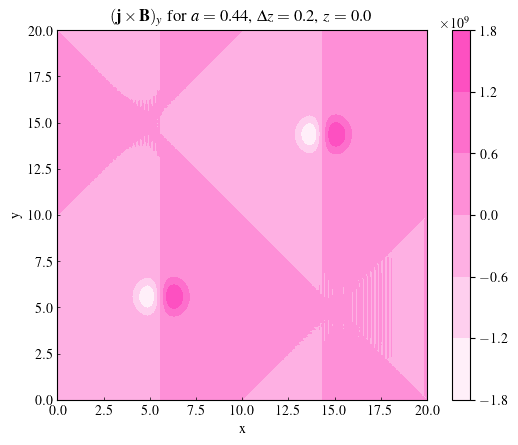

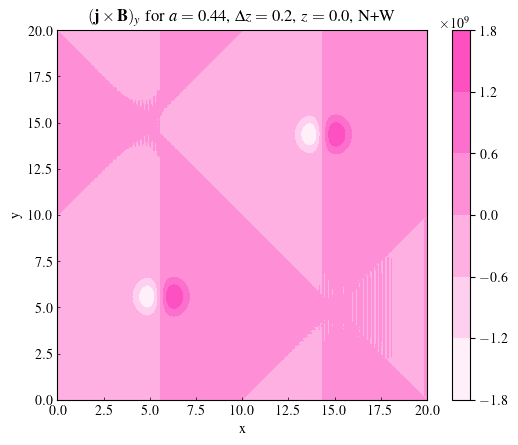

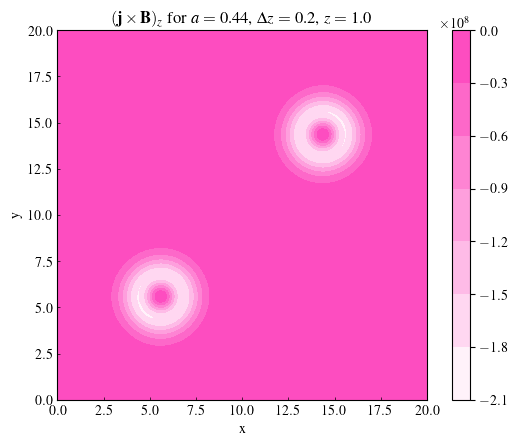

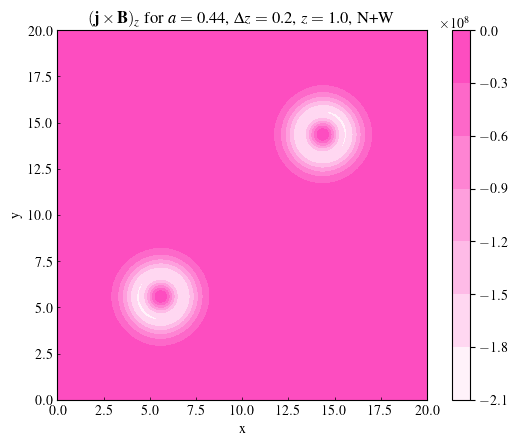

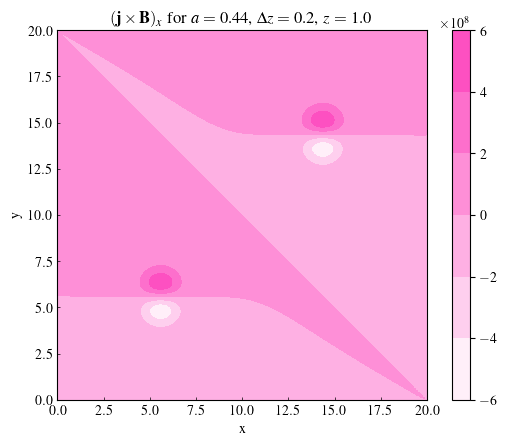

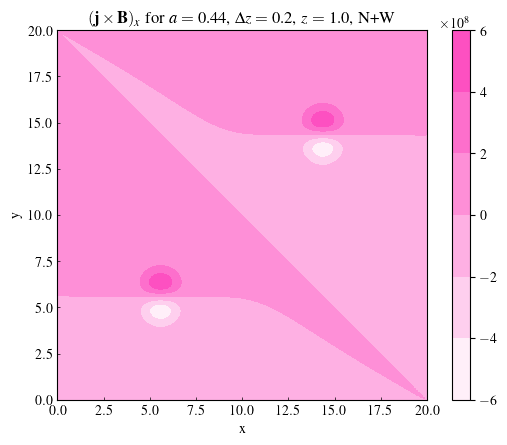

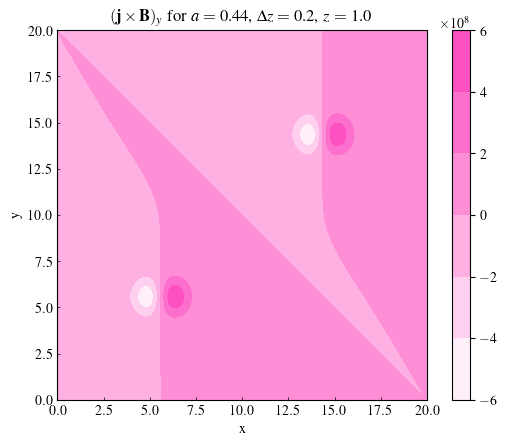

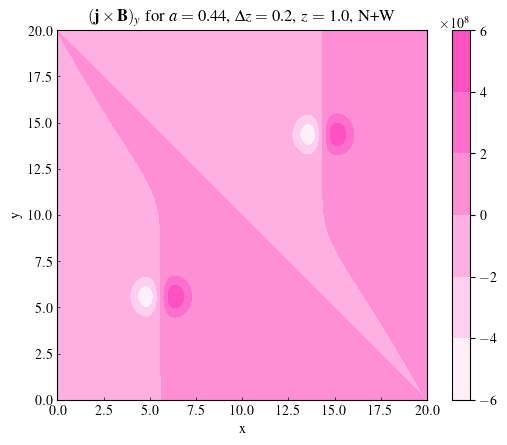

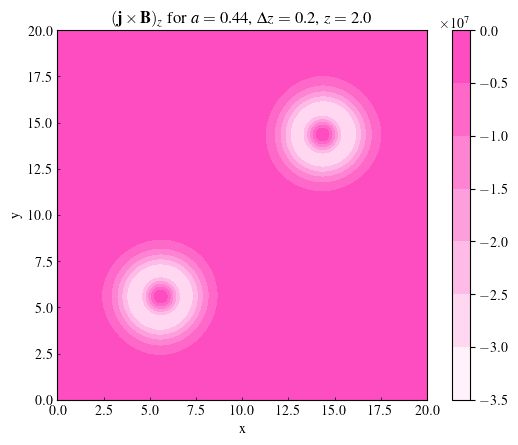

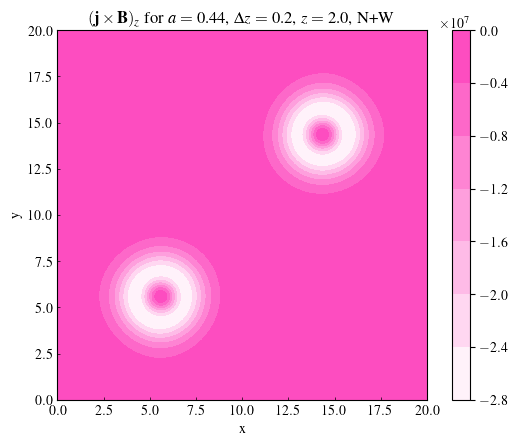

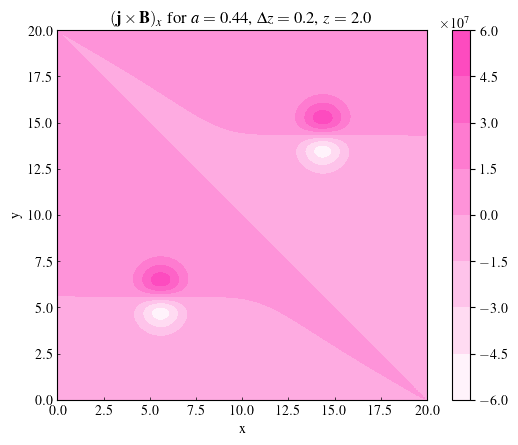

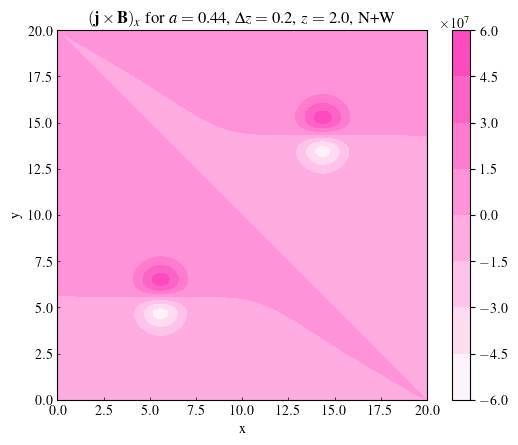

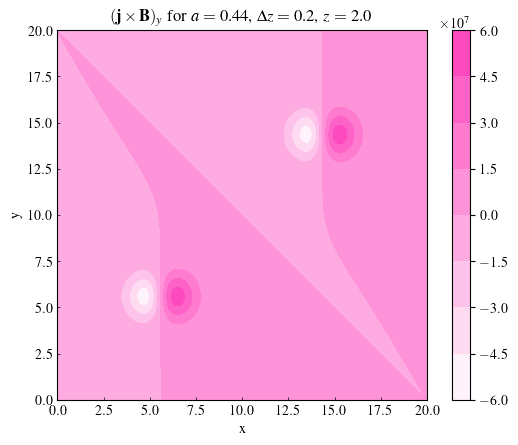

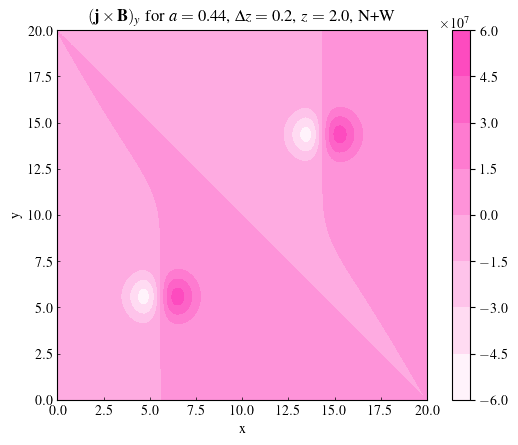

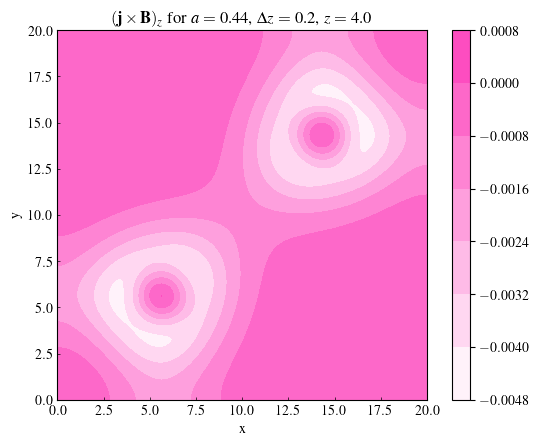

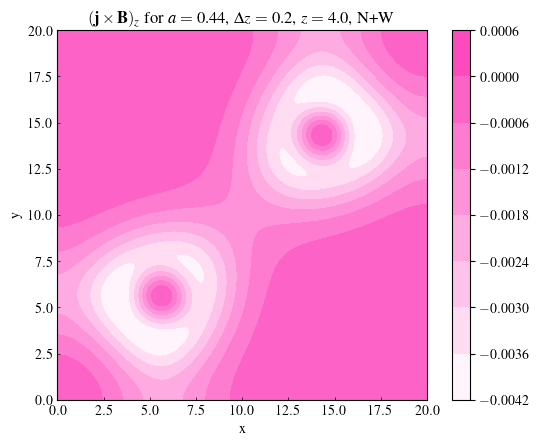

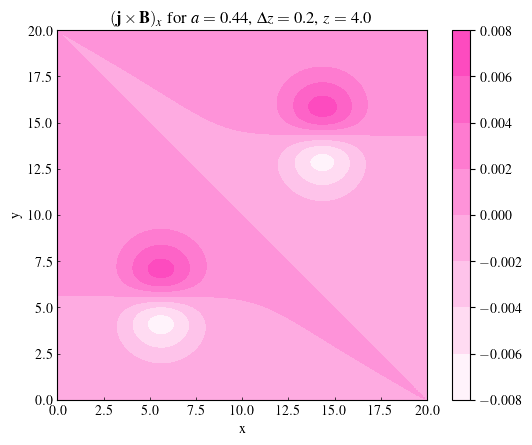

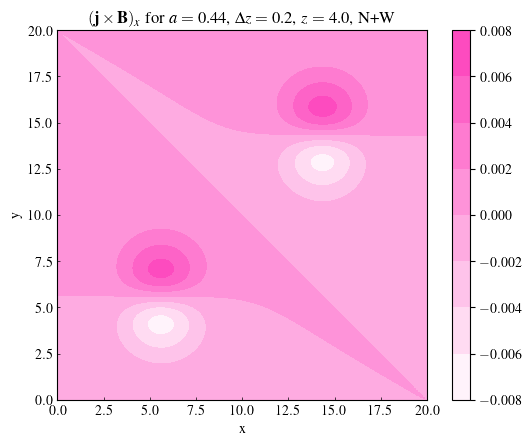

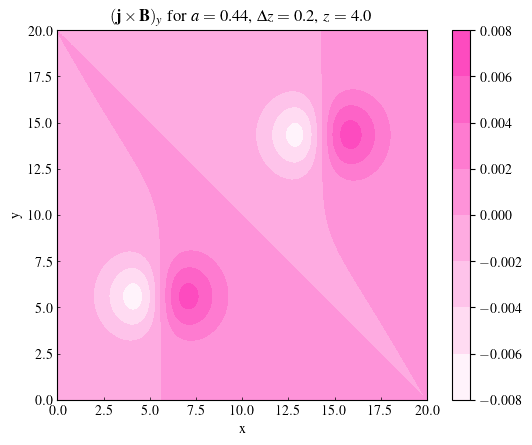

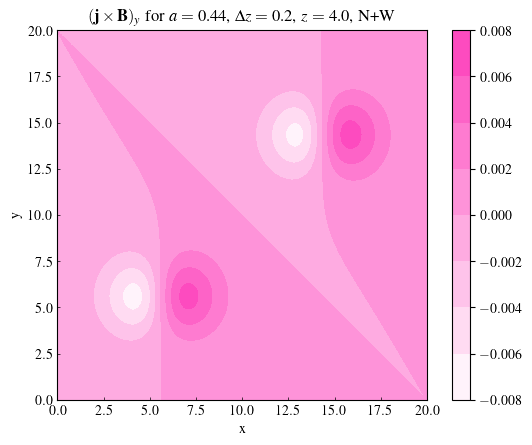

In [17]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_z$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/LFz_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_z$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
        + r", N+W"
    )
    plotname = folder + "/LFz_NW_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_x$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/LFx_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_x$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
        + r", N+W"
    )
    plotname = folder + "/LFx_NW_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3d.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_y$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/LFy_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        data3dNW.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$(\textbf{j}\times\textbf{B})_y$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
        + r", N+W"
    )
    plotname = folder + "/LFy_NW_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [18]:
errorx02_max = np.zeros_like(z_arr)
errory02_max = np.zeros_like(z_arr)
errorz02_max = np.zeros_like(z_arr)
errorx10_max = np.zeros_like(z_arr)
errory10_max = np.zeros_like(z_arr)
errorz10_max = np.zeros_like(z_arr)
errorx20_max = np.zeros_like(z_arr)
errory20_max = np.zeros_like(z_arr)
errorz20_max = np.zeros_like(z_arr)

In [19]:
for iz in range(nresol_z):
    errorx02_max[iz] = abs(
        data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
        - data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
    ).max()
    errory02_max[iz] = abs(
        data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
        - data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
    ).max()
    errorz02_max[iz] = abs(
        data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
        - data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
    ).max()

    errorx10_max[iz] = abs(
        data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
        - data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
    ).max()
    errory10_max[iz] = abs(
        data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
        - data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
    ).max()
    errorz10_max[iz] = abs(
        data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
        - data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
    ).max()

    errorx20_max[iz] = abs(
        data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
        - data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]
    ).max()
    errory20_max[iz] = abs(
        data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
        - data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]
    ).max()
    errorz20_max[iz] = abs(
        data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
        - data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
    ).max()

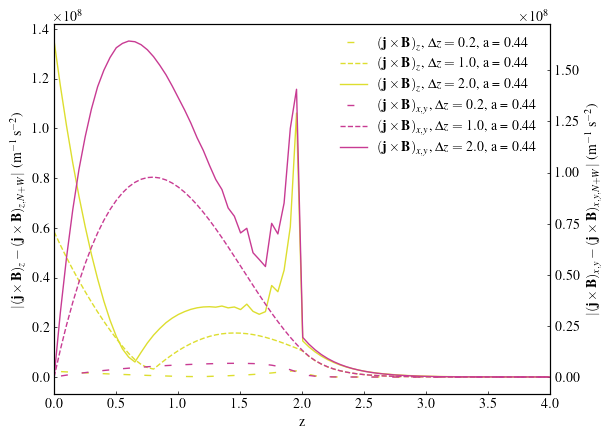

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(
    data3d.z,
    errorz02_max,
    linewidth=1.0,
    linestyle=(10, (5, 10)),
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 0.2$, a = " + str(a),
)
ax1.plot(
    data3d.z,
    errorz10_max,
    linewidth=1.0,
    linestyle="--",
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 1.0$, a = " + str(a),
)
ax1.plot(
    data3d.z,
    errorz20_max,
    linewidth=1.0,
    linestyle="solid",
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 2.0$, a = " + str(a),
)

ax2.plot(
    data3d.z,
    errory02_max,
    linewidth=1.0,
    linestyle=(10, (5, 10)),
    color=c5,
    label=r"$(\textbf{j} \times \textbf{B})_{x,y}$, $\Delta z = 0.2$, a = " + str(a),
)
ax2.plot(
    data3d.z,
    errory10_max,
    linewidth=1.0,
    linestyle="--",
    color=c5,
    label=r"$(\textbf{j} \times \textbf{B})_{x,y}$, $\Delta z = 1.0$, a = " + str(a),
)
ax2.plot(
    data3d.z,
    errory20_max,
    linewidth=1.0,
    linestyle="solid",
    color=c5,
    label=r"$(\textbf{j} \times \textbf{B})_{x,y}$, $\Delta z = 2.0$, a = " + str(a),
)

# ax2.plot(
#     data3d.z,
#     errorx02_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 0.2$",
# )
# ax2.plot(
#     data3d.z,
#     errorx10_max,
#     linewidth=1.0,
#     linestyle="--",
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 1.0$",
# )
# ax2.plot(
#     data3d.z,
#     errorx20_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 2.0$",
# )

# ax1.set_ylabel(r"kg m$^{-1}$ s$^{-2}$")


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)
ax2.tick_params(direction="in", length=2, width=0.5)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2 
labels = labels1 + labels2 
ax1.set_ylabel(r"$|(\textbf{j} \times \textbf{B})_z - (\textbf{j} \times \textbf{B})_{z, N+W}|$ (m$^{-1}$ s$^{-2}$)")
ax2.set_ylabel(r"$|(\textbf{j} \times \textbf{B})_{x,y} - (\textbf{j} \times \textbf{B})_{x, y, N+W}|$ (m$^{-1}$ s$^{-2}$)")
plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxerror_by_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [21]:
LFx02_max = np.zeros_like(z_arr)
LFy02_max = np.zeros_like(z_arr)
LFz02_max = np.zeros_like(z_arr)
LFx10_max = np.zeros_like(z_arr)
LFy10_max = np.zeros_like(z_arr)
LFz10_max = np.zeros_like(z_arr)
LFx20_max = np.zeros_like(z_arr)
LFy20_max = np.zeros_like(z_arr)
LFz20_max = np.zeros_like(z_arr)

LFx02_NW_max = np.zeros_like(z_arr)
LFy02_NW_max = np.zeros_like(z_arr)
LFz02_NW_max = np.zeros_like(z_arr)
LFx10_NW_max = np.zeros_like(z_arr)
LFy10_NW_max = np.zeros_like(z_arr)
LFz10_NW_max = np.zeros_like(z_arr)
LFx20_NW_max = np.zeros_like(z_arr)
LFy20_NW_max = np.zeros_like(z_arr)
LFz20_NW_max = np.zeros_like(z_arr)

In [22]:
# for iz in range(nresol_z):
#     LFx02_max[iz] = abs(data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()
#     LFx02_NW_max[iz] = abs(data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()

#     LFy02_max[iz] = abs(data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()
#     LFy02_NW_max[iz] = abs(data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()

#     LFz02_max[iz] = abs(data3d_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()
#     LFz02_NW_max[iz] = abs(data3dNW_02.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()

#     LFx10_max[iz] = abs(data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()
#     LFx10_NW_max[iz] = abs(data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()

#     LFy10_max[iz] = abs(data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()
#     LFy10_NW_max[iz] = abs(data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()

#     LFz10_max[iz] = abs(data3d_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()
#     LFz10_NW_max[iz] = abs(data3dNW_10.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()

#     LFx20_max[iz] = abs(data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()
#     LFx20_NW_max[iz] = abs(data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1]).max()

#     LFy20_max[iz] = abs(data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()
#     LFy20_NW_max[iz] = abs(data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0]).max()

#     LFz20_max[iz] = abs(data3d_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()
#     LFz20_NW_max[iz] = abs(data3dNW_20.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]).max()

In [23]:
# fig, ax1 = plt.subplots()

# ax1.plot(
#     data3d.z,
#     LFx02_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 0.2$",
# )
# ax1.plot(
#     data3d.z,
#     LFx02_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_{x, N+W}$, $\Delta z = 0.2$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFx10_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 1.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFx10_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_{x, N+W}$, $\Delta z = 1.0$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFx20_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 2.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFx20_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_{x, N+W}$, $\Delta z = 2.0$, ",
# )


# ax1.set_xlabel("z")
# plt.xlim([0, 2 * z0])
# plt.legend(frameon=False)
# ax1.tick_params(direction="in", length=2, width=0.5)
# #
# plt.title(
#     r"Maximal error in Lorentz force by height, $a =$ " + str(a)
# )
# lines1, labels1 = ax1.get_legend_handles_labels()
# #
# lines = lines1 #
# labels = labels1 #
# ax1.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x$")
# #ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
# plt.legend(lines, labels, frameon=False)
# plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFx_by_z.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
# plt.show()

In [24]:
# fig, ax1 = plt.subplots()

# ax1.plot(
#     data3d.z,
#     LFy02_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 0.2$",
# )
# ax1.plot(
#     data3d.z,
#     LFy02_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_{y, N+W}$, $\Delta z = 0.2$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFy10_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 1.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFy10_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_{y, N+W}$, $\Delta z = 1.0$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFy20_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 2.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFy20_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_{y, N+W}$, $\Delta z = 2.0$, ",
# )


# ax1.set_xlabel("z")
# plt.xlim([0, 2 * z0])
# plt.legend(frameon=False)
# ax1.tick_params(direction="in", length=2, width=0.5)
# #
# plt.title(
#     r"Maximal error in Lorentz force by height, $a =$ " + str(a)
# )
# lines1, labels1 = ax1.get_legend_handles_labels()
# #
# lines = lines1 #
# labels = labels1 #
# ax1.set_ylabel(r"$(\textbf{j} \times \textbf{B})_y$")
# #ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
# plt.legend(lines, labels, frameon=False)
# plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFy_by_z.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
# plt.show()

In [25]:
# fig, ax1 = plt.subplots()

# ax1.plot(
#     data3d.z,
#     LFz02_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 0.2$",
# )
# ax1.plot(
#     data3d.z,
#     LFz02_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c1,
#     label=r"$(\textbf{j} \times \textbf{B})_{z, N+W}$, $\Delta z = 0.2$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFz10_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 1.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFz10_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c5,
#     label=r"$(\textbf{j} \times \textbf{B})_{z, N+W}$, $\Delta z = 1.0$, ",
# )

# ax1.plot(
#     data3d.z,
#     LFz20_max,
#     linewidth=1.0,
#     linestyle="solid",
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 2.0$",
# )
# ax1.plot(
#     data3d.z,
#     LFz20_NW_max,
#     linewidth=1.0,
#     linestyle=(10, (5, 10)),
#     color=c8,
#     label=r"$(\textbf{j} \times \textbf{B})_{z, N+W}$, $\Delta z = 2.0$, ",
# )


# ax1.set_xlabel("z")
# plt.xlim([0, 2 * z0])
# plt.legend(frameon=False)
# ax1.tick_params(direction="in", length=2, width=0.5)
# #
# plt.title(
#     r"Maximal error in Lorentz force by height, $a =$ " + str(a)
# )
# lines1, labels1 = ax1.get_legend_handles_labels()
# #
# lines = lines1 #
# labels = labels1 #
# ax1.set_ylabel(r"$(\textbf{j} \times \textbf{B})_z$")
# #ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
# plt.legend(lines, labels, frameon=False)
# plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFz_by_z.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
# plt.show()

In [26]:
ix_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[1]
iy_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[0]

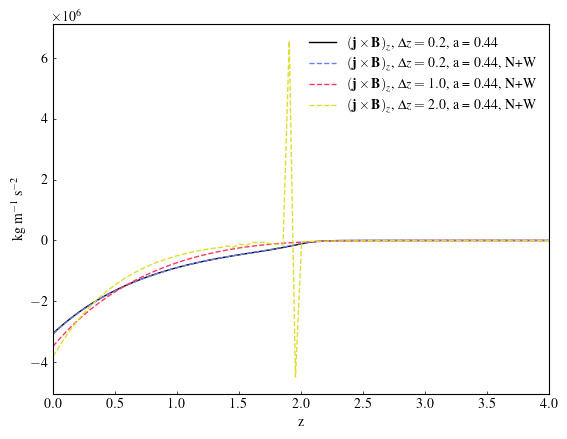

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_02.z,
    data3d_02.lf3D[iy_max, ix_max, :, 2],
    linewidth=1.0,
    linestyle="solid",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 0.2$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_02.lf3D[iy_max, ix_max, :, 2],
    linewidth=1.0,
    linestyle="--",
    color=c2,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 0.2$, a = " + str(a)+ r", N+W",
)

ax1.plot(
    data3d_02.z,
    data3dNW_10.lf3D[iy_max, ix_max, :, 2],
    linewidth=1.0,
    linestyle="--",
    color=c4,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 1.0$, a = " + str(a)+ r", N+W",
)

ax1.plot(
    data3d_02.z,
    data3dNW_20.lf3D[iy_max, ix_max, :, 2],
    linewidth=1.0,
    linestyle="--",
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_z$, $\Delta z = 2.0$, a = " + str(a)+ r", N+W",
)

ax1.set_ylabel(r"kg m$^{-1}$ s$^{-2}$")
ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
ax1.tick_params(direction="in", length=2, width=0.5)
#
# plt.title(
#     r"Maximal current density by height, $a =$ " + str(a)
# )
lines1, labels1 = ax1.get_legend_handles_labels()
#
lines = lines1 #
labels = labels1 #
#ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFz_by_z_all.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

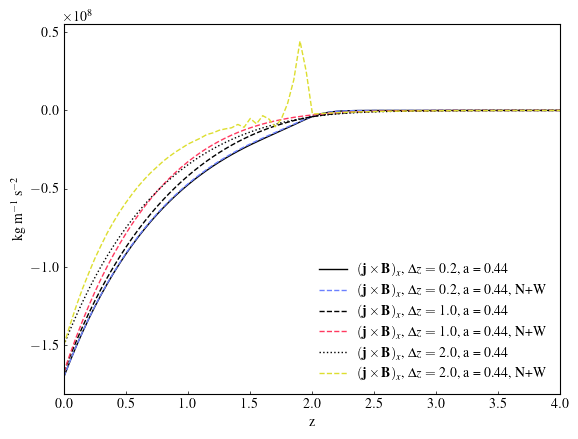

In [28]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_02.z,
    data3d_02.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="solid",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 0.2$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_02.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="dashed",
    color=c2,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 0.2$, a = " + str(a)+ r", N+W",
)


ax1.plot(
    data3d_02.z,
    data3d_10.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="dashed",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 1.0$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_10.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="--",
    color=c4,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 1.0$, a = " + str(a)+ r", N+W",
)


ax1.plot(
    data3d_02.z,
    data3d_20.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="dotted",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 2.0$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_20.lf3D[iy_max, ix_max, :, 1],
    linewidth=1.0,
    linestyle="--",
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_x$, $\Delta z = 2.0$, a = " + str(a)+ r", N+W",
)

ax1.set_ylabel(r"kg m$^{-1}$ s$^{-2}$")

ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
ax1.tick_params(direction="in", length=2, width=0.5)
#
# plt.title(
#     r"Maximal current density by height, $a =$ " + str(a)
# )
lines1, labels1 = ax1.get_legend_handles_labels()
#
lines = lines1 #
labels = labels1 #
#ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFx_by_z_all.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

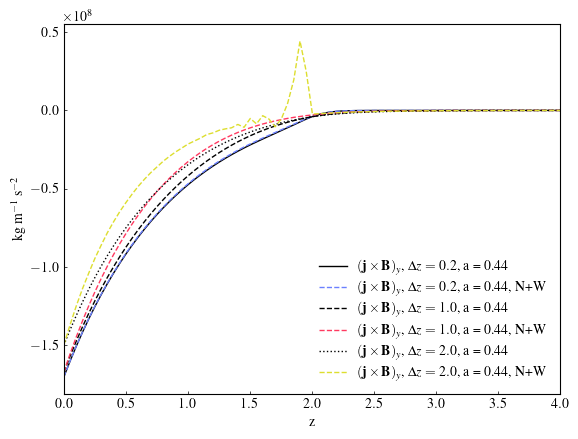

: 

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_02.z,
    data3d_02.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="solid",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 0.2$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_02.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="dashed",
    color=c2,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 0.2$, a = " + str(a)+ r", N+W",
)

ax1.plot(
    data3d_02.z,
    data3d_10.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="dashed",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 1.0$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_10.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="--",
    color=c4,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 1.0$, a = " + str(a) + r", N+W",
)

ax1.plot(
    data3d_02.z,
    data3d_20.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="dotted",
    color=c3,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 2.0$, a = " + str(a),
)
ax1.plot(
    data3d_02.z,
    data3dNW_20.lf3D[iy_max, ix_max, :, 0],
    linewidth=1.0,
    linestyle="--",
    color=c8,
    label=r"$(\textbf{j} \times \textbf{B})_y$, $\Delta z = 2.0$, a = " + str(a) + r", N+W",
)

ax1.set_ylabel(r"kg m$^{-1}$ s$^{-2}$")

ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
ax1.tick_params(direction="in", length=2, width=0.5)
#
# plt.title(
#     r"Maximal current density by height, $a =$ " + str(a)
# )
lines1, labels1 = ax1.get_legend_handles_labels()
#
lines = lines1 #
labels = labels1 #
#ax2.set_ylabel(r"$(\textbf{j} \times \textbf{B})_x, (\textbf{j} \times \textbf{B})_y$")
plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/LF/" + str(a) + "/maxLFy_by_z_all.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()